## <span style="color:#0b486b">Convolutional Neural Networks and Image Classification</span>

This task is designed to assess your knowledge and coding skill with Tensorflow as well as hands-on experience with training Convolutional Neural Network (CNN).

The dataset we use for this part is the [STL10 dataset](https://cs.stanford.edu/~acoates/stl10/) which consists of $5,000$ training images of airplane, bird, car, cat, deer, dog, horse, monkey, ship, truck; each of which has 500 images. You can download the dataset at [download here](https://drive.google.com/file/d/1bEwEx72lLrjY_Idj_FgV22atIdjtCV66/view?usp=sharing) and then decompress to the folder `datasets\Animals`.**

Your task is to build a CNN model using *TF 2.x* to classify these animals. You're provided with the module <span style="color:red">A1_S2_2023.py</span>, which you can find in the assignment folder, with some of the following classes:

1. `DatasetManager`: Support with loading and spliting the dataset into the train-val-test sets. It also supports generating next batches for training. 
2. `BaseImageClassifier`: A base class image classfication, which is basically a CNN model.

*Note*: You may need to install the package `imutils` if you have not installed yet

In [1]:
# pip install imutils

Firstly, we need to run the following cells to load required packages.

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# pip install ipywidgets

In [4]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
from A1_S2_2023 import DatasetManager, BaseImageClassifier

Note that the class `DatasetManager` has attributes related to *the training, validation, and testing sets*. You can use them in training your developped models in the sequel.

In [5]:
# pip install tensorflow_datasets

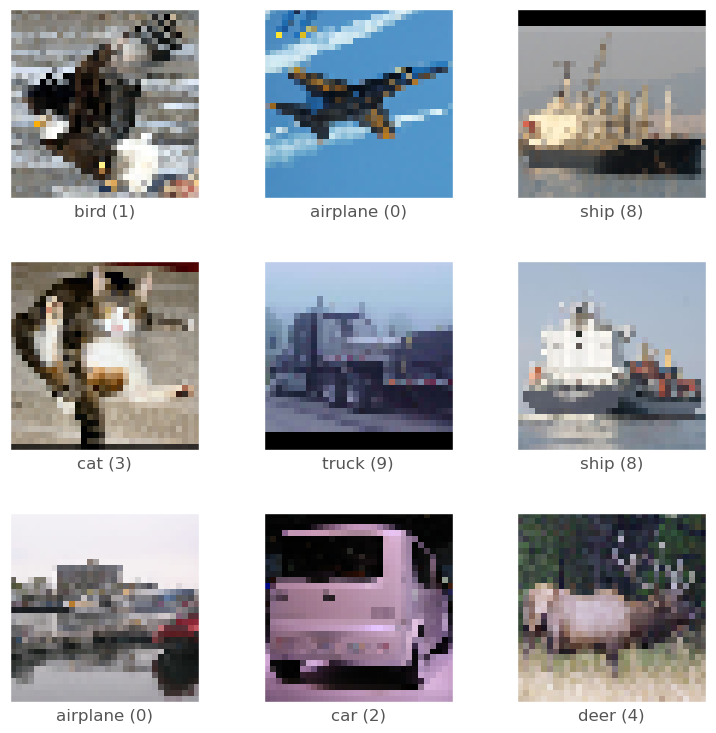

In [6]:
dataset_name = 'stl10'
# Choose path to store dataset
data_dir = '{}/tensorflow_datasets'.format(os.path.expanduser('~'))

data_manager = DatasetManager(dataset_name, data_dir)
data_manager.load_dataset() 
data_manager.preprocess_dataset()
data_manager.show_examples()

In [7]:
# Choose a random example
import random
num_examples = tf.data.experimental.cardinality(data_manager.ds_train).numpy()
random_index = random.randint(0, num_examples - 1)
example = next(iter(data_manager.ds_train.skip(random_index).take(1)))[0]

# Print the shape and value of the image
print("Image shape:", example.shape)
print("Image value range:", example.numpy().min(), "to", example.numpy().max())

Image shape: (32, 32, 3)
Image value range: 0.003921569 to 0.99607843


In [8]:
# Check the number of examples in each dataset
print(tf.data.experimental.cardinality(data_manager.ds_train))
print(tf.data.experimental.cardinality(data_manager.ds_val))
print(tf.data.experimental.cardinality(data_manager.ds_test))

tf.Tensor(4500, shape=(), dtype=int64)
tf.Tensor(500, shape=(), dtype=int64)
tf.Tensor(8000, shape=(), dtype=int64)


We now use **BaseImageClassifier** built in the **A1_S2_2023.py** file which serves as a basic baseline to start the investigation. Follow the following steps to realize how to run a model and know the built-in methods associated with.

In [9]:
network1 = BaseImageClassifier(name='network1',
                       num_classes=10,
                       optimizer='sgd',
                       batch_size=128,
                       num_epochs=20,
                       learning_rate=0.001)

We first initialize a default model from the BaseImageClassifier class. Basically, we can define the relevant parameters of training a model including `num_classes`, `optimizer`, `learning_rate`, `batch_size`, and `num_epochs`.

The method `build_cnn()` assists us in building your convolutional neural network. You can view the code (in the **A1_S2_2023.py** file) of the model behind a default model to realize how simple it is. Additionally, the method `summary()` shows the architecture of a model.

In [10]:
network1.build_cnn()
network1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 average_pooling2d (AverageP  (None, 16, 16, 32)       0         
 ooling2D)                                                       
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 average_pooling2d_1 (Averag  (None, 8, 8, 64)         0         
 ePooling2D)                                          

In [11]:
x_train_batch = network1.optimize_data_pipeline(data_manager.ds_train, batch_size=32)
x_val_batch = network1.optimize_data_pipeline(data_manager.ds_val, batch_size=32)
network1.fit(x_train_batch, x_val_batch, num_epochs=20)

Epoch 1/20
141/141 [==============================] - 9s 57ms/step - loss: 2.2901 - accuracy: 0.1229 - val_loss: 2.2666 - val_accuracy: 0.1420
Epoch 2/20
141/141 [==============================] - 8s 57ms/step - loss: 2.2113 - accuracy: 0.1951 - val_loss: 2.1164 - val_accuracy: 0.2380
Epoch 3/20
141/141 [==============================] - 8s 56ms/step - loss: 2.0415 - accuracy: 0.2609 - val_loss: 1.9693 - val_accuracy: 0.2980
Epoch 4/20
141/141 [==============================] - 8s 55ms/step - loss: 1.9499 - accuracy: 0.2991 - val_loss: 1.9148 - val_accuracy: 0.3200
Epoch 5/20
141/141 [==============================] - 8s 59ms/step - loss: 1.9024 - accuracy: 0.3200 - val_loss: 1.8756 - val_accuracy: 0.3300
Epoch 6/20
141/141 [==============================] - 8s 56ms/step - loss: 1.8587 - accuracy: 0.3393 - val_loss: 1.8442 - val_accuracy: 0.3380
Epoch 7/20
141/141 [==============================] - 7s 52ms/step - loss: 1.8201 - accuracy: 0.3527 - val_loss: 1.8193 - val_accuracy: 0.3520

To train a model regarding to the datasets stored in `data_manager`, you can invoke the method `fit()` for which you can specify the batch size and number of epochs for your training. 

In [12]:
x_test_batch = network1.optimize_data_pipeline(data_manager.ds_test, batch_size=32)
network1.compute_accuracy(x_test_batch)

250/250 [==============================] - 7s 29ms/step - loss: 1.5732 - accuracy: 0.4259
loss: 1.5732494592666626
accuracy: 0.4258750081062317


Below shows how you can inspect the training progress.

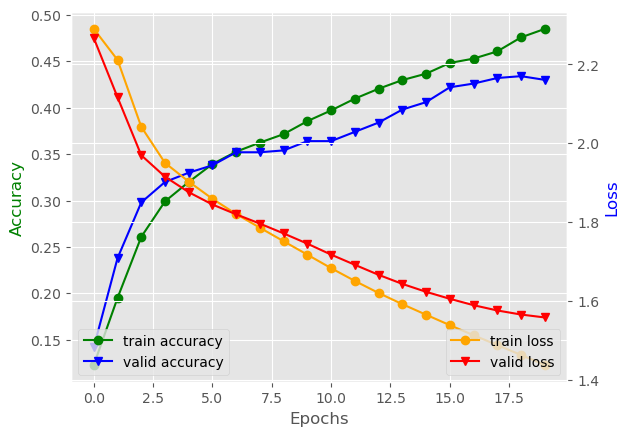

In [13]:
network1.plot_progress()

You can use the method `predict()` to predict labels for data examples in a test set.

In [14]:
num_samples = 25
sample_dataset = data_manager.ds_test.take(num_samples)
network1.predict(sample_dataset.batch(num_samples), data_manager.ds_info)

1/1 [==============================] - 0s 161ms/step
Sample 1: Predicted label - truck
Sample 2: Predicted label - monkey
Sample 3: Predicted label - cat
Sample 4: Predicted label - bird
Sample 5: Predicted label - ship
Sample 6: Predicted label - dog
Sample 7: Predicted label - deer
Sample 8: Predicted label - horse
Sample 9: Predicted label - airplane
Sample 10: Predicted label - cat
Sample 11: Predicted label - deer
Sample 12: Predicted label - ship
Sample 13: Predicted label - horse
Sample 14: Predicted label - ship
Sample 15: Predicted label - horse
Sample 16: Predicted label - cat
Sample 17: Predicted label - deer
Sample 18: Predicted label - airplane
Sample 19: Predicted label - truck
Sample 20: Predicted label - ship
Sample 21: Predicted label - dog
Sample 22: Predicted label - horse
Sample 23: Predicted label - truck
Sample 24: Predicted label - truck
Sample 25: Predicted label - airplane


Finally, the method `plot_prediction()` visualizes the predictions for a test set in which several images are chosen to show the predictions.

1/1 [==============================] - 0s 78ms/step


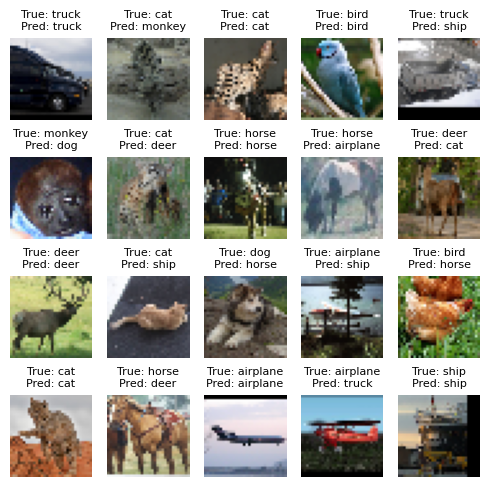

In [15]:
num_samples = 20
sample_dataset = data_manager.ds_test.take(num_samples)
network1.plot_predictions(sample_dataset, data_manager.ds_info, num_samples=num_samples, grid_shape=(4, 5))

### <span style="color:#0b486b">Question 3.1: Observe the learning curve</span> 
After running the above cells to train the default model and observe the learning curve. Report your observation (i.e. did the model learn well? if not, what is the problem? What would you do to improve it?). Write your answer below.

<div style="text-align: right"> <span style="color:red">[4 points]</span> </div>

The model did not learn well as its resulting accuracy (after evaluation by using the testing data) is considered very low, which is only $0.4440000057220459$. It could be deduced that the model is most probably facing an underfitting issue as its train accuracy is considered low as well, which does not even exceed $0.5$ after training with $20$ epochs. Plus, based on the learning curve from the plot of model training progress, we can observe that throughout all the $20$ epochs, the valid accuracy is constantly or generally increasing with the increase in train accuracy, whereas the valid loss is also constantly or generally decreasing with the decrease in train loss. Also, there is no huge gap spotted between the train loss and valid loss, as well as between the train accuracy and valid accuracy. Thus, there is no any signs of overfitting observed from the plot. 

To overcome overfitting issue, there are several approaches to improve the model, such as hyperparameters tuning, data augmentation, and adding complexity to model. 

1. **Hyperparameters Tuning:**<br>We can tune the parameters used for model training to systematically search for the best value of the parameters such as learning rate, number of blocks in the network architecture, optimizer, batch size, activation function, use of skip connection, and others. This can be done via grid search, iterative search (brute force) or random search.<br><br>

2. **Data Augmentation:**<br>We can translate the images such as by shifting and flipping the images horizontally via the module `ImageDataGenerator`. By doing this, we can technically create more variations of clean data to make the model generalise better to unseen examples. By doing this, the model can have more data to learn the underlying patterns more effectively, which can help to reduce underfitting. <br><br>

3. **Adding Complexity to Model:**<br>We can add more number of layers to the model to increase the depth of the network architecture, increasing the model complexity. Introducing more hidden layers might enable the model to capture more complex underlying patterns in the data.

**For questions 3.2 to 3.9**, you'll need to write your own model in a way that makes it easy for you to experiment with different architectures and parameters. The goal is to be able to pass the parameters to initialize a new instance of `YourModel` to build different network architectures with different parameters. Below are descriptions of some parameters which you can find in function `__init__()` for the class `BaseImageClassifier`:

1. `num_blocks`: an integer specifying the number of blocks in our network. Each block has the pattern `[conv, batch norm, activation, conv, batch norm, activation, mean pool, dropout]`. All convolutional layers have filter size $(3, 3)$, strides $(1, 1)$ and 'SAME' padding, and all mean pool layers have strides $(2, 2)$ and 'SAME' padding. The network will consists of a few blocks before applying a linear layer to output the logits for the softmax layer.

2. `feature_maps`: the number of feature maps in the first block of the network. The number of feature_maps will double in each of the following block. To make it convenient for you, we already calculated the number of feature maps for each block for you in line $106$
3. `drop_rate`: the keep probability for dropout. Setting `drop_rate` to $0.0$ means not using dropout. 
4. `batch_norm`: the batch normalization function is used or not. Setting `batch_norm` to `None` means not using batch normalization. 
5. The `skip connection` is added to the output of the second `batch norm`. Additionally, your class has a boolean property (i.e., instance variable) named `use_skip`. If `use_skip=True`, the skip connection is enable. Otherwise, if `use_skip=False`, the skip connectnion is disable.

Below is the architecture of one block:

<img src="Figures/OneBlock.png" width="350" align="center"/>

Below is the architecture of the entire deep net with `two blocks`:

<img src="Figures/NetworkArchitecture.png" width="1200" align="center"/>

Here we assume that the first block has `feature_maps = feature_maps[0] = 32`. Note that the initial number of feature maps of the first block is declared in the instance variable `feature_maps` and is multiplied by $2$ in each following block. 

In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

tf.random.set_seed(3181)

### <span style="color:#0b486b">Question 3.2: Define your CNN</span>

Write the code of the `YourModel` class here. Note that this class will be inherited from the `BaseImageClassifier` class. You'll only need to re-write the code for the `build_cnn` method in the `YourModel` class from the cell below.

<div style="text-align: right"> <span style="color:red">[4 points]</span> </div>

In [17]:
class YourModel(BaseImageClassifier):
    def __init__(self,
                 name='network1',
                 width=32, height=32, depth=3,
                 num_blocks=2,
                 feature_maps=32,
                 num_classes=4,
                 drop_rate=0.2,
                 batch_norm=None,
                 is_augmentation=False,
                 activation_func='relu',
                 optimizer='adam',
                 use_skip=True,
                 batch_size=10,
                 num_epochs=20,
                 learning_rate=0.0001,
                 verbose=True):
        super(YourModel, self).__init__(name, width, height, depth, num_blocks, feature_maps, num_classes, drop_rate, batch_norm, is_augmentation, 
                                        activation_func, use_skip, optimizer, batch_size, num_epochs, learning_rate, verbose)
        
    
    def build_cnn(self):
        first_block = True
        X = layers.Input(shape=(self.width, self.height, self.depth))
        for i in range(self.num_blocks):
            if first_block: 
                h = layers.Conv2D(filters=self.feature_maps[i], kernel_size=(3,3), strides=(1,1), padding='same')(X)
            else:
                h = layers.Conv2D(filters=self.feature_maps[i], kernel_size=(3,3), strides=(1,1), padding='same')(h)
            skip_conv = h
            if self.batch_norm:
                h = layers.BatchNormalization()(h)
            h = layers.Activation(self.activation_func)(h)
            h = layers.Conv2D(filters=self.feature_maps[i], kernel_size=(3,3), strides=(1,1), padding='same')(h)
            if self.batch_norm:
                h = layers.BatchNormalization()(h)
            if self.use_skip:
                h += skip_conv
            h = layers.Activation(self.activation_func)(h)
            h = layers.AveragePooling2D(strides=(2,2), padding='same')(h)
            h = layers.Dropout(rate=self.drop_rate)(h)
            first_block = False
            
        h = layers.Flatten()(h)
        h = layers.Dense(units=self.num_classes, activation='softmax')(h)
        self.model = models.Model(inputs=X, outputs=h)
        self.model.compile(optimizer=self.optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### <span style="color:#0b486b">Question 3.3: Experiment with skip connection</span> 
Once writing your own model, you need to compare two cases: (i) *using the skip connection* and (ii) *not using the skip connection*. You should set the instance variable `use_skip` to either `True` or `False`. For your runs, report which case is better and if you confront overfitting in training.
    
<div style="text-align: right"> <span style="color:red">[6 points]</span> </div>

The case in which the model is trained by using the skip connection performs better (loss value = $1.5674015283584595$, accuarcy value = $0.6428750157356262$) if compared to that of without using the skip connection (loss value = $1.662560224533081$, accuracy value = $0.609000027179718$), as `our_network_skip` has lower loss value and higher accuracy value than that of `our_network_no_skip`.

Both the models trained with and without using skip connection seem to have confronted overfitting issue in their training processes as there shows some signs of overfitting problem according to the analysis below.

Based on the learning curve from the plot of training progress for the model with skip connection, it could be deduced that the model starts confronting overfitting problem since the $17^{th}$ epoch as we can observe that the valid loss remains roughly constant since the $17^{th}$ epoch onwards, despite its train loss is still constantly decreasing and approching to $0$. Also, from the plot, throughout the last $3$ epochs during training, it is visible that the valid accuracy becomes roughly constant as well, despite the train accuracy of the model reaches exactly $1$ (which means 100% accurate predictions on training data).

On the other hand, based on the learning curve from the plot of training progress for the model without using skip connection, it could be assumed that the model starts confronting overfitting problem since the $17^{th}$ epoch as we can observe that the valid loss suddenly increases, despite its train loss is still constantly decreasing and approching to $0$. Also, from the plot, throughout the last $3$ epochs during training, it is visible that the valid accuracy becomes roughly constant as well, despite the train accuracy of the model approaches very nearly to $1$ (which can be considered as extremely accurate predictions on training data). 

Plus, from both the plots shown below, huge gaps (difference in value) can be spotted between the train loss and valid loss, as well as between the train accuracy and valid accuracy, which is also one of the signs of overfitting problem that we can see from both the learning curves.

Nevertheless, further epochs might be required to train the model without using skip connection to better justify whether or not it confronts overfitting issue based on its learning curves from the plot of training progress. For example, if in further epochs after the $20^{th}$ the valid loss is still showing significant or constant decrease in its value, and at the same time the valid accuracy is still showing significant or constant increase in its value, then probably we could deduce that this model is not confronting any overfitting issue as the gaps between train loss and valid loss, as well as between train accuracy and valid accuracy would be further reduced in the later epochs iteratively.

In [18]:
our_network_skip = YourModel(name='network1_skip',
                     feature_maps=32,
                     num_classes=data_manager.n_classes,
                     num_blocks=3,
                     drop_rate=0.0, 
                     batch_norm=True, 
                     use_skip=True,
                     optimizer='adam',
                     learning_rate=0.001)
our_network_skip.build_cnn()
our_network_skip.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_4 (Conv2D)              (None, 32, 32, 32)   896         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 32, 32, 32)  128         ['conv2d_4[0][0]']               
 alization)                                                                                       
                                                                                                  
 activation (Activation)        (None, 32, 32, 32)   0           ['batch_normalization[0][0]']

In [19]:
our_network_skip.fit(x_train_batch, x_val_batch, num_epochs=20)

Epoch 1/20
141/141 [==============================] - 12s 74ms/step - loss: 1.6591 - accuracy: 0.3824 - val_loss: 3.1028 - val_accuracy: 0.1120
Epoch 2/20
141/141 [==============================] - 10s 73ms/step - loss: 1.2419 - accuracy: 0.5456 - val_loss: 2.9952 - val_accuracy: 0.1540
Epoch 3/20
141/141 [==============================] - 10s 71ms/step - loss: 0.9907 - accuracy: 0.6420 - val_loss: 1.9542 - val_accuracy: 0.3440
Epoch 4/20
141/141 [==============================] - 10s 71ms/step - loss: 0.7859 - accuracy: 0.7222 - val_loss: 1.5652 - val_accuracy: 0.4340
Epoch 5/20
141/141 [==============================] - 12s 83ms/step - loss: 0.6249 - accuracy: 0.7891 - val_loss: 1.3913 - val_accuracy: 0.5120
Epoch 6/20
141/141 [==============================] - 11s 80ms/step - loss: 0.5275 - accuracy: 0.8331 - val_loss: 1.4704 - val_accuracy: 0.4820
Epoch 7/20
141/141 [==============================] - 10s 68ms/step - loss: 0.4269 - accuracy: 0.8647 - val_loss: 1.7466 - val_accuracy:

In [20]:
our_network_skip.compute_accuracy(x_test_batch)

250/250 [==============================] - 8s 33ms/step - loss: 1.5674 - accuracy: 0.6429
loss: 1.5674015283584595
accuracy: 0.6428750157356262


Inspect the training progress of the model with skip connection.

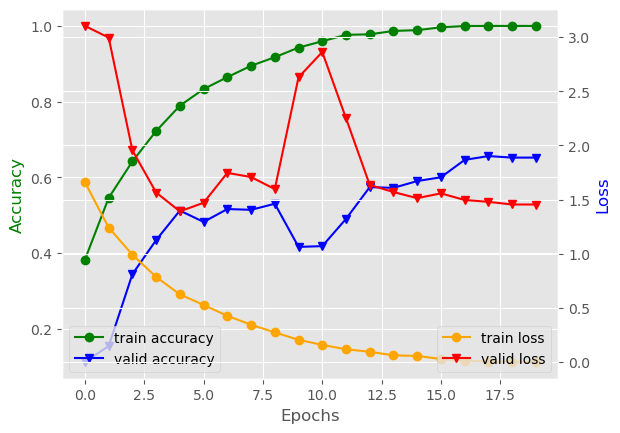

In [21]:
our_network_skip.plot_progress()

In [22]:
our_network_no_skip = YourModel(name='network1_no_skip',
                     feature_maps=32,
                     num_classes=data_manager.n_classes,
                     num_blocks=3,
                     drop_rate=0.0, 
                     batch_norm=True, 
                     use_skip=False,
                     optimizer='adam',
                     learning_rate=0.001)
our_network_no_skip.build_cnn()
our_network_no_skip.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_6 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_6 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_7 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                           

In [23]:
our_network_no_skip.fit(x_train_batch, x_val_batch, num_epochs=20)

Epoch 1/20
141/141 [==============================] - 11s 72ms/step - loss: 1.7198 - accuracy: 0.3698 - val_loss: 3.4601 - val_accuracy: 0.0880
Epoch 2/20
141/141 [==============================] - 10s 70ms/step - loss: 1.3448 - accuracy: 0.4962 - val_loss: 2.7567 - val_accuracy: 0.2120
Epoch 3/20
141/141 [==============================] - 10s 70ms/step - loss: 1.1106 - accuracy: 0.5927 - val_loss: 1.6675 - val_accuracy: 0.4060
Epoch 4/20
141/141 [==============================] - 10s 68ms/step - loss: 0.9143 - accuracy: 0.6636 - val_loss: 1.6439 - val_accuracy: 0.4240
Epoch 5/20
141/141 [==============================] - 10s 67ms/step - loss: 0.7580 - accuracy: 0.7349 - val_loss: 1.5242 - val_accuracy: 0.4860
Epoch 6/20
141/141 [==============================] - 10s 72ms/step - loss: 0.6075 - accuracy: 0.7976 - val_loss: 1.6137 - val_accuracy: 0.4760
Epoch 7/20
141/141 [==============================] - 11s 76ms/step - loss: 0.4920 - accuracy: 0.8420 - val_loss: 1.6107 - val_accuracy:

In [24]:
our_network_no_skip.compute_accuracy(x_test_batch)

250/250 [==============================] - 8s 31ms/step - loss: 1.6626 - accuracy: 0.6090
loss: 1.662560224533081
accuracy: 0.609000027179718


Inspect the training progress of the model without using skip connection.

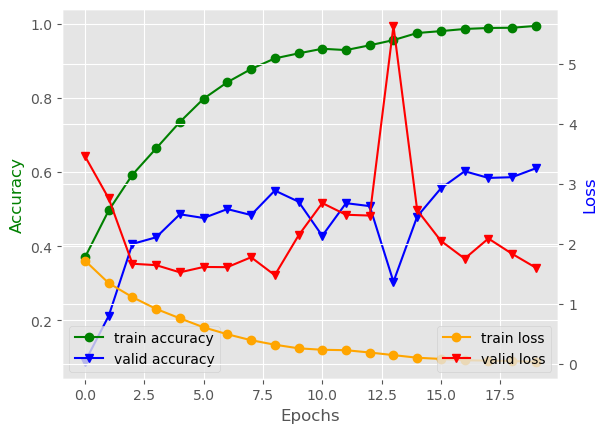

In [25]:
our_network_no_skip.plot_progress()

### <span style="color:#0b486b">Question 3.4: Tune hyperparameters with grid search</span>

Now, let us tune the $num\_blocks \in \{2,3,4\}$, $use\_skip \in \{True, False\}$, and $learning\_rate \in \{0.001, 0.0001\}$. Write your code for this tuning and report the result of the best model on the testing set. Note that you need to show your code for tuning and evaluating on the test set to earn the full marks. During tuning, you can set the instance variable `verbose` of your model to `False` for not showing the training details of each epoch.
 
<div style="text-align: right"> <span style="color:red">[4 points]</span> </div>

The best model with the highest testing accuracy is the model trained with the parameters *$num\_blocks = 3$*, *$use\_skip = True$*, and *$learning\_rate = 0.001$*, which has the testing accuracy of $0.6104999780654907$.

In [26]:
num_blocks = [2,3,4]
use_skip = [True, False]
learning_rate = [0.001, 0.0001]

best_acc = 0
best_num_blocks = None
best_use_skip = None
best_learning_rate = None

for block in num_blocks:
    for skip in use_skip:
        for lr in learning_rate:
            network_tuning = YourModel(name='network_tuning',
                                 feature_maps=32,
                                 num_classes=data_manager.n_classes,
                                 num_blocks=block,
                                 drop_rate=0.0, 
                                 batch_norm=True, 
                                 use_skip=skip,
                                 optimizer='adam',
                                 learning_rate=lr,
                                 verbose=False)
            print("*Evaluating with num_blocks = {}, use_skip = {}, learning rate = {}\n".format(block, skip, lr))
            network_tuning.build_cnn()
            network_tuning.fit(x_train_batch, x_val_batch, num_epochs=20)
            x_test_batch = network_tuning.optimize_data_pipeline(data_manager.ds_test, batch_size=32)
            acc = network_tuning.model.evaluate(x_test_batch)[1]   # retrieve the accuracy value
            print("\nThe testing accuracy is {}\n".format(acc))
            if acc > best_acc:
                best_acc = acc
                best_num_blocks = block
                best_use_skip = skip
                best_learning_rate = lr
                
print("The best testing accuracy is {} with num_blocks = {}, use_skip = {}, learning_rate = {}".format(best_acc, best_num_blocks, best_use_skip, best_learning_rate))

*Evaluating with num_blocks = 2, use_skip = True, learning rate = 0.001

250/250 [==============================] - 8s 33ms/step - loss: 1.9107 - accuracy: 0.5814

The testing accuracy is 0.581375002861023

*Evaluating with num_blocks = 2, use_skip = True, learning rate = 0.0001

250/250 [==============================] - 8s 31ms/step - loss: 1.3195 - accuracy: 0.5530

The testing accuracy is 0.5529999732971191

*Evaluating with num_blocks = 2, use_skip = False, learning rate = 0.001

250/250 [==============================] - 8s 33ms/step - loss: 1.8497 - accuracy: 0.5769

The testing accuracy is 0.5768749713897705

*Evaluating with num_blocks = 2, use_skip = False, learning rate = 0.0001

250/250 [==============================] - 9s 37ms/step - loss: 1.2376 - accuracy: 0.5660

The testing accuracy is 0.5659999847412109

*Evaluating with num_blocks = 3, use_skip = True, learning rate = 0.001

250/250 [==============================] - 8s 31ms/step - loss: 1.7230 - accuracy: 0.6105

T

### <span style="color:#0b486b">Question 3.5: Apply data augmentation</span>

We now try to apply data augmentation to improve the performance. Extend the code of the class `YourModel` so that if the attribute `is_augmentation` is set to `True`, we apply the data augmentation. Also you need to incorporate early stopping to your training process. Specifically, you early stop the training if the valid accuracy cannot increase in three consecutive epochs.
   
<div style="text-align: right"> <span style="color:red">[4 points]</span> </div>

In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [28]:
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping

Wtire your code in the cell below. Hint that you can rewrite the code of the `fit` method to apply the data augmentation. In addition, you can copy the code of `build_cnn` method above to reuse here.

In [29]:
# Preprocess the training data by extracting all the data from the existing x_train_batch(es) into single arrays

X_train = []
y_train = []

for data in x_train_batch:
    images, labels = data
    for image in images:
        X_train.append(image.numpy())
    for label in labels:
        y_train.append(label.numpy())
        
# convert into numpy
X_train = np.array(X_train)
y_train = np.array(y_train)

print(X_train.shape)
print(y_train.shape)

(4500, 32, 32, 3)
(4500,)


In [30]:
class YourModel(BaseImageClassifier):
    def __init__(self,
                 name='network1',
                 width=32, height=32, depth=3,
                 num_blocks=2,
                 feature_maps=32,
                 num_classes=4, 
                 drop_rate=0.2,
                 batch_norm = None,
                 is_augmentation = False,
                 activation_func='relu',
                 use_skip = True,
                 optimizer='adam',
                 batch_size=10,
                 num_epochs= 20,
                 learning_rate=0.0001):
        super(YourModel, self).__init__(name, width, height, depth, num_blocks, feature_maps, num_classes, drop_rate, batch_norm, is_augmentation, 
                                        activation_func, use_skip, optimizer, batch_size, num_epochs, learning_rate)
    
    def build_cnn(self):
        first_block = True
        X = tf.keras.layers.Input(shape=(self.width, self.height, self.depth))
        for i in range(self.num_blocks):
            if first_block: 
                h = tf.keras.layers.Conv2D(filters=self.feature_maps[i], kernel_size=(3,3), strides=(1,1), padding='same')(X)
            else:
                h = tf.keras.layers.Conv2D(filters=self.feature_maps[i], kernel_size=(3,3), strides=(1,1), padding='same')(h)
            skip_conv = h
            if self.batch_norm is not None:
                h = tf.keras.layers.BatchNormalization()(h)
            h = tf.keras.layers.Activation(self.activation_func)(h)
            h = tf.keras.layers.Conv2D(filters=self.feature_maps[i], kernel_size=(3,3), strides=(1,1), padding='same')(h)
            if self.batch_norm is not None:
                h = tf.keras.layers.BatchNormalization()(h)
            if self.use_skip:
                h += skip_conv
            h = tf.keras.layers.Activation(self.activation_func)(h)
            h = tf.keras.layers.AveragePooling2D(strides=(2,2), padding='same')(h)
            h = tf.keras.layers.Dropout(rate=self.drop_rate)(h)
            first_block = False
            
        h = tf.keras.layers.Flatten()(h)
        h = tf.keras.layers.Dense(units=self.num_classes, activation='softmax')(h)
        self.model = tf.keras.models.Model(inputs=X, outputs=h)
        
    
    def fit(self, data_manager, batch_size=None, num_epochs=None):
        num_epochs = self.num_epochs if num_epochs is None else num_epochs
        batch_size = self.batch_size if batch_size is None else batch_size
        # self.model.compile(optimizer=self.optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        
        # Early Stopping
        early_checkpoint = EarlyStopping(patience=3, monitor='val_accuracy', mode='max')   # stop once the val_accuracy is not increasing for 3 times in a row
        callbacks = [early_checkpoint]
        
        # Data Augmentation
        if self.is_augmentation:
            datagen = ImageDataGenerator(horizontal_flip=True, width_shift_range=0.1, height_shift_range=0.1)
            datagen.fit(X_train)
            it = datagen.flow(X_train, y_train, batch_size=batch_size)
            self.model.compile(optimizer=self.optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
            self.history = self.model.fit(it, epochs=num_epochs, validation_data=x_val_batch, callbacks=callbacks)
        else:
            self.model.compile(optimizer=self.optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
            x_train_batch = network1.optimize_data_pipeline(data_manager.ds_train, batch_size=32)
            self.history = self.model.fit(x_train_batch, epochs=num_epochs, validation_data=x_val_batch, callbacks=callbacks)

### <span style="color:#0b486b">Question 3.6: Observe model performance with data augmentation</span>

Leverage your best model with the data augmentation and try to observe the difference in performance between using data augmentation and not using it.
   
<div style="text-align: right"> <span style="color:red">[4 points]</span> </div>

The best model with data augmentation has better performance due to its higher testing accuracy ($0.5348749756813049$) and lower testing loss ($1.590048909187317$) if compared to that of without using data augmentation (testing accuracy = $0.5191249847412109$, testing loss = $1.9268471002578735$). 

On the other hand, both the models with and without data augmentation do encounter overfitting issues during the model training, as it can be observed that early stopping occurs during the training of both models. 

However, without applying data augmentation, the model will run into early stopping earlier (at a smaller number of consecutive epoch) than the model with data augmentation. To elaborate, early stopping happens right after the $15^{th}$ epoch for the `best_model_data_aug`, whereas early stopping happens right after the $9^{th}$ epoch for the `best_model_no_data_aug` during the training process. 

From the result of Question 3.4 above, it can be observed that the best model obtained (without data augmentation) gives us the testing accuracy of $0.6104999780654907$, which is much higher than the testing accuracy of $0.5348749756813049$ retrieved in this Question 3.6 although both models have the same parameter values. The lower testing accuracy obtained in this question is probably due to the reason that the model training process has stopped early before it actually finishes in this case. In other words, the model has not yet seen all the available training data before its accuracy is evaluated with the testing data, resulting in lower accuracy obtained. Consequently, data augmentation can help to generalize the model and prevent overfitting issue.

<br>Training model with data augmentation.

In [31]:
# num_blocks = 3
# use_skip = True
# learning_rate = 0.001

best_model_data_aug = YourModel(name='best_model_data_aug',
                                feature_maps=32,
                                num_classes=data_manager.n_classes,
                                num_blocks=best_num_blocks,
                                drop_rate=0.0, 
                                batch_norm=True, 
                                is_augmentation=True,
                                use_skip=best_use_skip,
                                optimizer='adam',
                                learning_rate=best_learning_rate)

best_model_data_aug.build_cnn()
# best_model_data_aug.summary()
best_model_data_aug.fit(data_manager, num_epochs=20, batch_size=32)

Epoch 1/20
141/141 [==============================] - 12s 77ms/step - loss: 1.7901 - accuracy: 0.3384 - val_loss: 3.0354 - val_accuracy: 0.0880
Epoch 2/20
141/141 [==============================] - 11s 76ms/step - loss: 1.4878 - accuracy: 0.4413 - val_loss: 4.1577 - val_accuracy: 0.1320
Epoch 3/20
141/141 [==============================] - 10s 72ms/step - loss: 1.3874 - accuracy: 0.4851 - val_loss: 1.5754 - val_accuracy: 0.3980
Epoch 4/20
141/141 [==============================] - 10s 73ms/step - loss: 1.2702 - accuracy: 0.5416 - val_loss: 1.5639 - val_accuracy: 0.4620
Epoch 5/20
141/141 [==============================] - 11s 75ms/step - loss: 1.2089 - accuracy: 0.5580 - val_loss: 1.2946 - val_accuracy: 0.5160
Epoch 6/20
141/141 [==============================] - 12s 82ms/step - loss: 1.1240 - accuracy: 0.5907 - val_loss: 1.3380 - val_accuracy: 0.5340
Epoch 7/20
141/141 [==============================] - 10s 73ms/step - loss: 1.0691 - accuracy: 0.5980 - val_loss: 1.7212 - val_accuracy:

Compute the accuracy of model trained with data augmentation in predictions.

In [32]:
best_model_data_aug.compute_accuracy(x_test_batch)

250/250 [==============================] - 6s 25ms/step - loss: 1.5900 - accuracy: 0.5349
loss: 1.590048909187317
accuracy: 0.5348749756813049


Training model without using data augmentation.

In [33]:
# num_blocks = 3
# use_skip = True
# learning_rate = 0.001

best_model_no_data_aug = YourModel(name='best_model_no_data_aug',
                                feature_maps=32,
                                num_classes=data_manager.n_classes,
                                num_blocks=best_num_blocks,
                                drop_rate=0.0, 
                                batch_norm=True, 
                                is_augmentation=False,
                                use_skip=best_use_skip,
                                optimizer='adam',
                                learning_rate=best_learning_rate)

best_model_no_data_aug.build_cnn()
# best_model_data_aug.summary()
best_model_no_data_aug.fit(data_manager, num_epochs=20, batch_size=32)

Epoch 1/20
141/141 [==============================] - 13s 83ms/step - loss: 1.6600 - accuracy: 0.3880 - val_loss: 3.0634 - val_accuracy: 0.1240
Epoch 2/20
141/141 [==============================] - 11s 75ms/step - loss: 1.2595 - accuracy: 0.5373 - val_loss: 2.9960 - val_accuracy: 0.1820
Epoch 3/20
141/141 [==============================] - 10s 73ms/step - loss: 1.0117 - accuracy: 0.6327 - val_loss: 2.3134 - val_accuracy: 0.3240
Epoch 4/20
141/141 [==============================] - 10s 68ms/step - loss: 0.8154 - accuracy: 0.7136 - val_loss: 1.7126 - val_accuracy: 0.4880
Epoch 5/20
141/141 [==============================] - 10s 71ms/step - loss: 0.6542 - accuracy: 0.7780 - val_loss: 1.9479 - val_accuracy: 0.4800
Epoch 6/20
141/141 [==============================] - 9s 67ms/step - loss: 0.5403 - accuracy: 0.8296 - val_loss: 1.9276 - val_accuracy: 0.5060
Epoch 7/20
141/141 [==============================] - 10s 69ms/step - loss: 0.4134 - accuracy: 0.8729 - val_loss: 1.7166 - val_accuracy: 

Compute the accuracy of model trained without using data augmentation in predictions.

In [34]:
best_model_no_data_aug.compute_accuracy(x_test_batch)

250/250 [==============================] - 7s 27ms/step - loss: 1.9268 - accuracy: 0.5191
loss: 1.9268471002578735
accuracy: 0.5191249847412109


In [35]:
# The accuracy value of model trained with data augmentation is higher
best_is_augmentation = True

### <span style="color:#0b486b">Question 3.7: Explore data mixup technique</span>

<div style="text-align: right"> <span style="color:red">[4 points]</span> </div>

Data mixup is another super-simple technique used to boost the generalization ability of deep learning models. You need to incoroporate data mixup technique to the above deep learning model and experiment its performance. There are some papers and documents for data mixup as follows:
- Main paper for data mixup [link for main paper](https://openreview.net/pdf?id=r1Ddp1-Rb) and a good article [article link](https://www.inference.vc/mixup-data-dependent-data-augmentation/).

You need to extend your model developed above, train a model using data mixup, and write your observations and comments about the result.

When evaluated with testing data, it can be observed that the accuracy of the model trained with both data augmentation and data mixup (accuracy = $0.3003750145435333$) in this Question 3.7 is significantly lower than the accuracy value obtained from the model trained with solely data augmentation but without data mixup (accuracy = $0.5348749756813049$) in Question 3.6. 

The drop in model accuracy in this case is probably because data mixup could help to improve model generalization by reducing the complexity of model in order to overcome overfitting issue. By doing so, the model would become more generalized to the unseen data and therefore more accurate predictions could be made on the new data, which is any data other than the training data. 

Another possible reason of dropped accuracy in the model trained using data mixup in this case is that, we are using back all the hyperparameter values that were previously used to train the `best_model_data_aug`. Presumably, these hyperparameter values could not give the best accuracy for the model trained with data mixup, which is `best_model_data_aug_mixup` in this scenario. Therefore, another round of hyperparameter tuning could be done on the `best_model_data_aug_mixup` model in order to find out the optimal or better hyperparameter values that can result in higher accuracy when the model is evaluated with testing data. 

In [36]:
class YourModel(BaseImageClassifier):
    def __init__(self,
                 name='network1',
                 width=32, height=32, depth=3,
                 num_blocks=2,
                 feature_maps=32,
                 num_classes=4, 
                 drop_rate=0.2,
                 batch_norm = None,
                 is_augmentation = False,
                 activation_func='relu',
                 use_skip = True,
                 optimizer='adam',
                 batch_size=10,
                 num_epochs= 20,
                 learning_rate=0.0001,
                 data_mixup = False):
        super(YourModel, self).__init__(name, width, height, depth, num_blocks, feature_maps, num_classes, drop_rate, batch_norm, is_augmentation, 
                                        activation_func, use_skip, optimizer, batch_size, num_epochs, learning_rate)
        self.data_mixup = data_mixup
    
    def build_cnn(self):
        first_block = True
        X = tf.keras.layers.Input(shape=(self.width, self.height, self.depth))
        for i in range(self.num_blocks):
            if first_block: 
                h = tf.keras.layers.Conv2D(filters=self.feature_maps[i], kernel_size=(3,3), strides=(1,1), padding='same')(X)
            else:
                h = tf.keras.layers.Conv2D(filters=self.feature_maps[i], kernel_size=(3,3), strides=(1,1), padding='same')(h)
            skip_conv = h
            if self.batch_norm is not None:
                h = tf.keras.layers.BatchNormalization()(h)
            h = tf.keras.layers.Activation(self.activation_func)(h)
            h = tf.keras.layers.Conv2D(filters=self.feature_maps[i], kernel_size=(3,3), strides=(1,1), padding='same')(h)
            if self.batch_norm is not None:
                h = tf.keras.layers.BatchNormalization()(h)
            if self.use_skip:
                h += skip_conv
            h = tf.keras.layers.Activation(self.activation_func)(h)
            h = tf.keras.layers.AveragePooling2D(strides=(2,2), padding='same')(h)
            h = tf.keras.layers.Dropout(rate=self.drop_rate)(h)
            first_block = False
            
        h = tf.keras.layers.Flatten()(h)
        h = tf.keras.layers.Dense(units=self.num_classes, activation='softmax')(h)
        self.model = tf.keras.models.Model(inputs=X, outputs=h)
        
    
    def fit(self, data_manager, batch_size=None, num_epochs=None):
        num_epochs = self.num_epochs if num_epochs is None else num_epochs
        batch_size = self.batch_size if batch_size is None else batch_size
        # self.model.compile(optimizer=self.optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        
        ### Early Stopping ###
        
        early_checkpoint = EarlyStopping(patience=3, monitor='val_accuracy', mode='max')   # stop once the val_accuracy is not increasing for 3 times in a row
        callbacks = [early_checkpoint]
        
        ### Data Augmentation ###
        
        if self.is_augmentation:
            datagen = ImageDataGenerator(horizontal_flip=True, width_shift_range=0.1, height_shift_range=0.1)
            datagen.fit(X_train)
            it = datagen.flow(X_train, y_train, batch_size=batch_size)
            self.model.compile(optimizer=self.optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
            self.history = self.model.fit(it, epochs=num_epochs, validation_data=x_val_batch, callbacks=callbacks)
        else:
            self.model.compile(optimizer=self.optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
            x_train_batch = network1.optimize_data_pipeline(data_manager.ds_train, batch_size=32)
            self.history = self.model.fit(x_train_batch, epochs=num_epochs, validation_data=x_val_batch, callbacks=callbacks)
            
        ### Data Mixup ###
        
        if self.data_mixup:
            BATCH_SIZE = 32
            BUFFER_SIZE = len(X_train)
            AUTO = tf.data.AUTOTUNE

            y_train_one_hot = tf.one_hot(y_train, data_manager.n_classes)   # convert into one-hot vector

            train_ds_1 = tf.data.Dataset.from_tensor_slices((X_train, y_train_one_hot)).shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(AUTO)
            train_ds_2 = tf.data.Dataset.from_tensor_slices((X_train, y_train_one_hot)).shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(AUTO)

            train_ds_loader_1 = iter(train_ds_1)
            train_ds_loader_2 = iter(train_ds_2)

            alpha = 0.2
            optimizer = self.optimizer
            
            for (x1, y1), (x2, y2) in zip(train_ds_loader_1, train_ds_loader_2):
                lam = np.random.beta(alpha, alpha)
                x = lam * x1 + (1. - lam) * x2
                y = lam * y1 + (1. - lam) * y2

                # update optimizer to minimize the loss value
                with tf.GradientTape() as tape:
                    predictions = self.model(x)
                    loss_value = tf.keras.losses.categorical_crossentropy(y, predictions)

                gradients = tape.gradient(loss_value, self.model.trainable_variables)
                optimizer.apply_gradients(zip(gradients, self.model.trainable_variables)) 

Training model with data mixup technique.

In [37]:
# num_blocks = 3
# use_skip = True
# learning_rate = 0.001
# is_augmentation = True
# data_mixup = True

best_model_data_aug_mixup = YourModel(name='best_model_data_aug_mixup',
                                      feature_maps=32,
                                      num_classes=data_manager.n_classes,
                                      num_blocks=best_num_blocks,
                                      drop_rate=0.0, 
                                      batch_norm=True, 
                                      is_augmentation=best_is_augmentation,
                                      use_skip=best_use_skip,
                                      optimizer='adam',
                                      learning_rate=best_learning_rate,
                                      data_mixup=True)

best_model_data_aug_mixup.build_cnn()
# best_model_data_aug.summary()
best_model_data_aug_mixup.fit(data_manager, num_epochs=20, batch_size=32)

Epoch 1/20
141/141 [==============================] - 11s 70ms/step - loss: 1.7677 - accuracy: 0.3444 - val_loss: 3.4009 - val_accuracy: 0.0880
Epoch 2/20
141/141 [==============================] - 11s 76ms/step - loss: 1.4810 - accuracy: 0.4500 - val_loss: 2.6938 - val_accuracy: 0.2080
Epoch 3/20
141/141 [==============================] - 11s 75ms/step - loss: 1.3819 - accuracy: 0.4893 - val_loss: 1.7815 - val_accuracy: 0.3560
Epoch 4/20
141/141 [==============================] - 11s 81ms/step - loss: 1.2800 - accuracy: 0.5253 - val_loss: 1.7980 - val_accuracy: 0.3820
Epoch 5/20
141/141 [==============================] - 11s 81ms/step - loss: 1.2111 - accuracy: 0.5513 - val_loss: 1.3856 - val_accuracy: 0.5080
Epoch 6/20
141/141 [==============================] - 11s 76ms/step - loss: 1.1381 - accuracy: 0.5851 - val_loss: 1.2656 - val_accuracy: 0.5320
Epoch 7/20
141/141 [==============================] - 11s 77ms/step - loss: 1.0581 - accuracy: 0.6104 - val_loss: 1.3137 - val_accuracy:

Compute the accuracy of model trained with data mixup technique in predictions.

In [38]:
best_model_data_aug_mixup.compute_accuracy(x_test_batch)

250/250 [==============================] - 8s 32ms/step - loss: 1.8083 - accuracy: 0.3004
loss: 1.808305263519287
accuracy: 0.3003750145435333


In [39]:
# The accuracy value of model trained with data mixup technique is lower than that without using data mixup
best_data_mixup = False

### <span style="color:#0b486b">Question 3.8: Attack your model</span>

Attack your best obtained model with PGD, MIM, and FGSM attacks with $\epsilon= 0.0313, k=20, \eta= 0.002$ on the testing set. Write the code for the attacks and report the robust accuracies. Also choose a random set of 20 clean images in the testing set and visualize the original and attacked images.
   
<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>

The robust accuracy of the best obtained model `best_model` is the highest for the FGSM attack ($0.08$ or $8\%$ accuracy), followed by the MIM attack ($0.072$ or $7.2\%$ accuracy), and lastly the PGD attack ($0.064$ or $6.4\%$ accuracy).

Define the functions for the three attacks.

In [40]:
def pgd_attack(model, input_image, input_label= None, 
              epsilon=0.3, 
              num_steps=20, 
              step_size=0.01, 
              clip_value_min=0., 
              clip_value_max=1.0, 
              soft_label=False,
              from_logits=False):
    """
    Args: 
        model: pretrained model = model that we want to attack 
        input_image: original (clean) input image (tensor)
        input_label: original label (tensor, categorical representation)
        epsilon: perturbation boundary 
        num_steps: number of attack steps 
        step_size: size of each move in each attack step 
        clip_value_min, clip_value_max: range of valid input 
        from_logits = True: attack from logits otherwise attack from prediction probabilites
    Note: 
        we expect the output of model should be logits vector  
    """       
    
    loss_fn = tf.keras.losses.sparse_categorical_crossentropy  #compute CE loss from logits or prediction probabilities
    
    if type(input_image) is np.ndarray: 
        input_image = tf.convert_to_tensor(input_image)
    
    if type(input_label) is np.ndarray: 
        input_label = tf.convert_to_tensor(input_label)
        
    # random initialization around input_image 
    random_noise = tf.random.uniform(shape=input_image.shape, minval=-epsilon, maxval=epsilon)
    adv_image = input_image + random_noise

    for _ in range(num_steps): 
        with tf.GradientTape(watch_accessed_variables=False) as tape: 
            tape.watch(adv_image)
            adv_output = model(adv_image)
            if not soft_label:
                loss = loss_fn(input_label, adv_output, from_logits= from_logits) # use ground-truth label to attack
            else: 
                pred_label = tf.math.argmax(adv_output, axis=1)
                loss = loss_fn(pred_label, adv_output, from_logits= from_logits) # use predicted label to attack

        gradient = tape.gradient(loss, adv_image) # get the gradient of the loss w.r.t. the current point 
        adv_image = adv_image + step_size * tf.sign(gradient) # move current adverarial example along the gradient direction with step size is eta 
        adv_image = tf.clip_by_value(adv_image, input_image-epsilon, input_image+epsilon) # clip to a valid boundary  
        adv_image = tf.clip_by_value(adv_image, clip_value_min, clip_value_max)  # clip to a valid range
        adv_image = tf.stop_gradient(adv_image) # stop the gradient to make the adversarial image as a constant input 
    return adv_image

In [41]:
def mim_attack(model, input_image, input_label= None, 
              epsilon=0.3, 
              gamma= 0.9,
              num_steps=20, 
              step_size=0.01, 
              clip_value_min=0., 
              clip_value_max=1.0, 
              soft_label=False,
              from_logits=False): 
    """
    Args: 
        model: pretrained model 
        input_image: original (clean) input image (tensor)
        input_label: original label (tensor, categorical representation)
        epsilon: perturbation boundary 
        gamma: momentum decay
        num_steps: number of attack steps 
        step_size: size of each move in each attack step 
        clip_value_min, clip_value_max: range of valid input 
        from_logits = True: attack from logits otherwise attack from prediction probabilites
    Note: 
        we expect the output of model should be logits vector  
    """       
    
    loss_fn = tf.keras.losses.sparse_categorical_crossentropy # compute CE loss from logits or prediction probabilities
    
    if type(input_image) is np.ndarray: 
        input_image = tf.convert_to_tensor(input_image)
    
    if type(input_label) is np.ndarray: 
        input_label = tf.convert_to_tensor(input_label)
        
    # random initialization around input_image 
    random_noise = tf.random.uniform(shape=input_image.shape, minval=-epsilon, maxval=epsilon)
    adv_image = input_image + random_noise
    adv_noise = random_noise

    for _ in range(num_steps): 
        with tf.GradientTape(watch_accessed_variables=False) as tape: 
            tape.watch(adv_image)
            adv_output = model(adv_image)
            if not soft_label:
                loss = loss_fn(input_label, adv_output, from_logits=from_logits) # use ground-truth label to attack
            else: 
                pred_label = tf.math.argmax(adv_output, axis=1)
                loss = loss_fn(pred_label, adv_output, from_logits=from_logits) # use predicted label to attack

        gradient = tape.gradient(loss, adv_image) # get the gradient of the loss w.r.t. the current point 
        adv_image_new = adv_image + step_size * tf.sign(gradient) # move current adverarial example along the gradient direction with step size is eta 
        adv_image_new = tf.clip_by_value(adv_image_new, input_image-epsilon, input_image+epsilon) # clip to a valid boundary  
        adv_image_new = tf.clip_by_value(adv_image_new, clip_value_min, clip_value_max) # clip to a valid range
        adv_noise = gamma*adv_noise + (1-gamma)*(adv_image_new - adv_image)
        adv_image = adv_image_new
        adv_image = tf.stop_gradient(adv_image) # stop the gradient to make the adversarial image as a constant input 
    adv_image = adv_image + adv_noise
    adv_image = tf.clip_by_value(adv_image, input_image-epsilon, input_image+epsilon) # clip to a valid boundary  
    adv_image = tf.clip_by_value(adv_image, clip_value_min, clip_value_max) # clip to a valid range
    return adv_image

In [42]:
def fgsm_attack(model, input_image, input_label=None, 
               epsilon=0.3, 
               clip_value_min=0., 
               clip_value_max=1.0, 
               soft_label=False,
               from_logits=False): 
    """
    Args: 
        model: pretrained model 
        input_image: original (clean) input image (tensor)
        input_label: original label (tensor, categorical representation)
        epsilon: perturbation boundary 
        clip_value_min, clip_value_max: range of valid input 
        from_logits = True: attack from logits otherwise attack from prediction probabilites
    Note: 
        we expect the output of model should be logits vector 
    """
    
    loss_fn = tf.keras.losses.sparse_categorical_crossentropy # compute CE loss from logits or prediction probabilities
    
    if type(input_image) is np.ndarray: 
        input_image = tf.convert_to_tensor(input_image)
    
    if type(input_label) is np.ndarray: 
        input_label = tf.convert_to_tensor(input_label)
        
    with tf.GradientTape() as tape: 
        tape.watch(input_image)
        output = model(input_image)
        if not soft_label:
            loss = loss_fn(input_label, output, from_logits=from_logits) # use ground-truth label to attack
        else: 
            pred_label = tf.math.argmax(output, axis=1) # use predicted label to attack
            loss = loss_fn(pred_label, output, from_logits=from_logits)

    gradient = tape.gradient(loss, input_image) # get the gradients of the loss w.r.t. the input image 
    adv_image = input_image + epsilon * tf.sign(gradient) # get the final adversarial examples 
    # epsilon is just a very small value
    adv_image = tf.clip_by_value(adv_image, clip_value_min, clip_value_max) # clip to a valid range  
    adv_image = tf.stop_gradient(adv_image) # stop the gradient to make the adversarial image as a constant input
    return adv_image

Initialize the best obtained model.

In [43]:
# num_blocks = 3
# use_skip = True
# learning_rate = 0.001
# is_augmentation = True
# data_mixup = False

best_model = YourModel(name='best_model',
                        feature_maps=32,
                        num_classes=data_manager.n_classes,
                        num_blocks=best_num_blocks,
                        drop_rate=0.0, 
                        batch_norm=True, 
                        is_augmentation=best_is_augmentation,
                        use_skip=best_use_skip,
                        optimizer='adam',
                        learning_rate=best_learning_rate,
                        data_mixup=best_data_mixup)
best_model.build_cnn()
best_model.fit(data_manager, num_epochs=20, batch_size=32)
#best_model.summary()

Epoch 1/20
141/141 [==============================] - 12s 79ms/step - loss: 1.7713 - accuracy: 0.3518 - val_loss: 3.3441 - val_accuracy: 0.1120
Epoch 2/20
141/141 [==============================] - 11s 76ms/step - loss: 1.4916 - accuracy: 0.4391 - val_loss: 3.0425 - val_accuracy: 0.1080
Epoch 3/20
141/141 [==============================] - 12s 83ms/step - loss: 1.3715 - accuracy: 0.4869 - val_loss: 1.9197 - val_accuracy: 0.3240
Epoch 4/20
141/141 [==============================] - 11s 79ms/step - loss: 1.2610 - accuracy: 0.5353 - val_loss: 1.3974 - val_accuracy: 0.4860
Epoch 5/20
141/141 [==============================] - 11s 79ms/step - loss: 1.2045 - accuracy: 0.5584 - val_loss: 1.7991 - val_accuracy: 0.4100
Epoch 6/20
141/141 [==============================] - 11s 76ms/step - loss: 1.1319 - accuracy: 0.5769 - val_loss: 1.2483 - val_accuracy: 0.5520
Epoch 7/20
141/141 [==============================] - 12s 82ms/step - loss: 1.0905 - accuracy: 0.6000 - val_loss: 1.0891 - val_accuracy:

In [44]:
def plot_image_grid(num_row, num_col, image, label, image_shape, is_adversarial):
    fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
    for i in range(num_row*num_col):
        ax = axes[i//num_col, i%num_col]
        ax.imshow(image[i].reshape(image_shape), cmap='gray')
        if not is_adversarial:
            ax.set_title('True Label: {}'.format(label[i]), fontsize=8)
        else:
            ax.set_title('Adversarial Label: {}'.format(label[i]), fontsize=8)
    plt.tight_layout()
    plt.show()

Collect a random set of 20 clean images in the testing set.

In [45]:
import logging

logger = tf.get_logger()
logger.setLevel(logging.ERROR) # ignore the warnings

nb_classes = data_manager.n_classes
samples_per_class = 2
total_samples = nb_classes * samples_per_class
buffer_size = len(data_manager.ds_test)   # number of all testing data

for image, label in x_test_batch.shuffle(buffer_size).take(1):
    image = image.numpy()
    label = label.numpy()
    image_samples = np.zeros([total_samples, 32, 32, 3], dtype='float32')
    label_samples = np.zeros((total_samples,), dtype=label.dtype)
    rng = np.random.RandomState()
    for i in range(nb_classes):
        yi_indices = np.where(label ==  i)[0]
        rng.shuffle(yi_indices)
        image_samples[samples_per_class * i:(i + 1) * samples_per_class, ...] = image[yi_indices[:samples_per_class]]
        label_samples[samples_per_class * i:(i + 1) * samples_per_class] = i

<br>
<u>PGD Attack</u>

In [47]:
y_adv = []
y_true = []
for X_batch, y_batch in x_test_batch:
    X_batch_adv = pgd_attack(model=best_model.model, 
                            input_image=X_batch, 
                            input_label=y_batch, 
                            epsilon=0.0313, 
                            num_steps=20, 
                            step_size=0.002, 
                            clip_value_min=0.0, 
                            clip_value_max=1.0,
                            soft_label=False)   # we provide input label
    y_batch_adv = np.argmax(best_model.model(X_batch_adv).numpy(), 1)
    y_adv.append(y_batch_adv[0].tolist())
    y_true.append(y_batch.numpy()[0].tolist())

Compute the robust accuracy after PGD attack.

In [48]:
from sklearn.metrics import accuracy_score

In [49]:
test_adv_acc_pgd = accuracy_score(y_true, y_adv)
print("Test adv accuracy for PGD attack: {}".format(test_adv_acc_pgd))

Test adv accuracy for PGD attack: 0.064


Attack the model with PGD attack on the testing set.

In [50]:
image_samples_adv_pgd = pgd_attack(model=best_model.model, 
                               input_image=image_samples, 
                               input_label=label_samples, 
                               epsilon=0.0313, 
                               num_steps=20, 
                               step_size=0.002, 
                               clip_value_min=0.0, 
                               clip_value_max=1.0)
image_samples_adv_pgd = image_samples_adv_pgd.numpy()
label_samples_adv_pgd = np.argmax(best_model.model(image_samples_adv_pgd).numpy(), 1)

Visualize 20 original images and true labels.

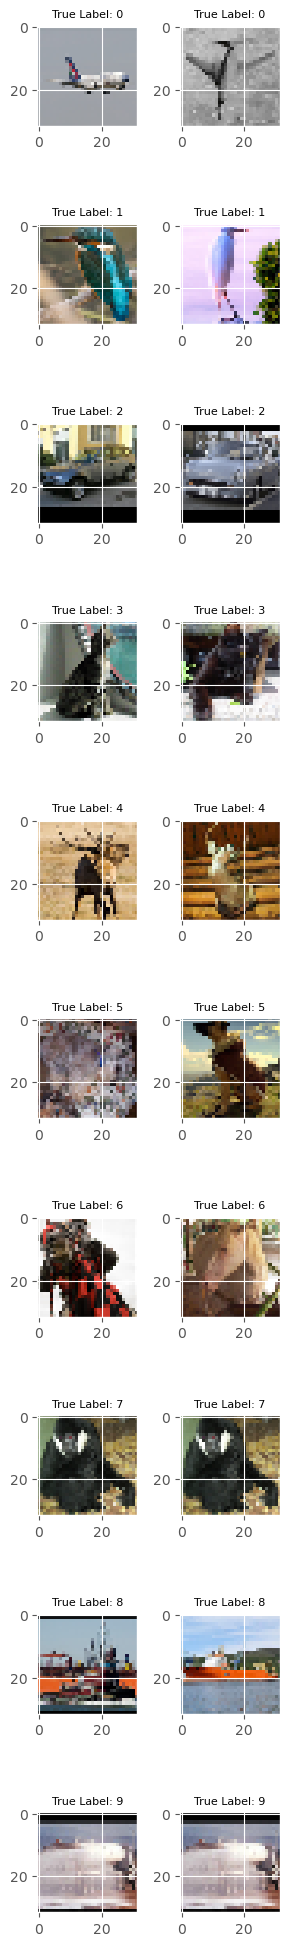

In [51]:
plot_image_grid(nb_classes, samples_per_class, image_samples, label_samples, (32,32,3), False)

Visualize 20 attacked images and adversarial labels.

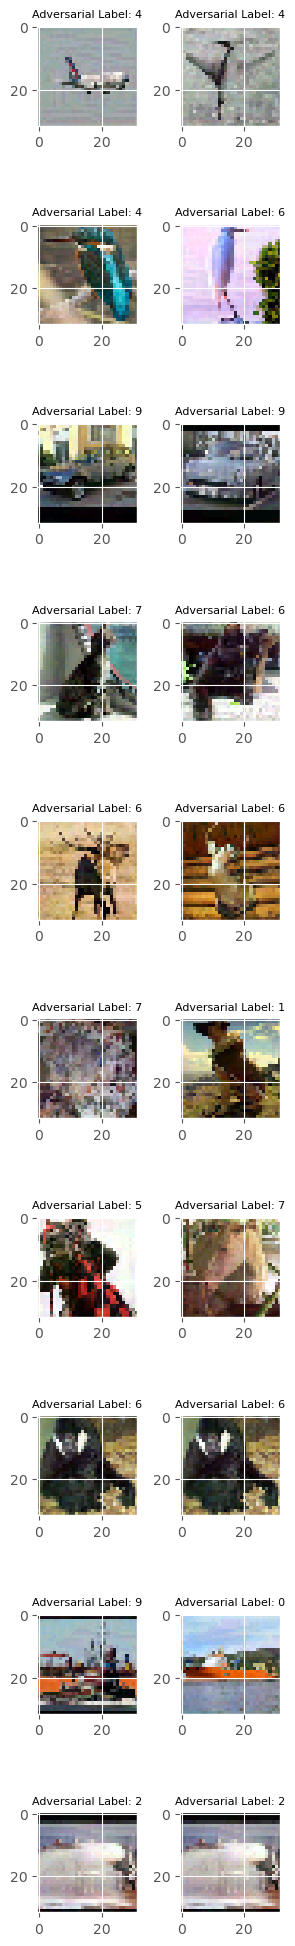

In [52]:
plot_image_grid(nb_classes, samples_per_class, image_samples_adv_pgd, label_samples_adv_pgd, (32,32,3), True)

<br>
<u>MIM Attack</u>

In [54]:
y_adv = []
y_true = []
for X_batch, y_batch in x_test_batch:
    X_batch_adv = mim_attack(model=best_model.model, 
                            input_image=X_batch, 
                            input_label=y_batch, 
                            epsilon=0.0313, 
                            num_steps=20, 
                            step_size=0.002, 
                            clip_value_min=0.0, 
                            clip_value_max=1.0,
                            soft_label=False)   # we provide input label
    y_batch_adv = np.argmax(best_model.model(X_batch_adv).numpy(), 1)
    y_adv.append(y_batch_adv[0].tolist())
    y_true.append(y_batch.numpy()[0].tolist())

Compute the robust accuracy after MIM attack.

In [55]:
test_adv_acc_mim = accuracy_score(y_true, y_adv)
print("Test adv accuracy for MIM attack: {}".format(test_adv_acc_mim))

Test adv accuracy for MIM attack: 0.072


Attack the model with MIM attack on the testing set.

In [56]:
image_samples_adv_mim = mim_attack(model=best_model.model, 
                               input_image=image_samples, 
                               input_label=label_samples, 
                               epsilon=0.0313, 
                               num_steps=20, 
                               step_size=0.002, 
                               clip_value_min=0.0, 
                               clip_value_max=1.0)
image_samples_adv_mim = image_samples_adv_mim.numpy()
label_samples_adv_mim = np.argmax(best_model.model(image_samples_adv_mim).numpy(), 1)

Visualize 20 original images and true labels.

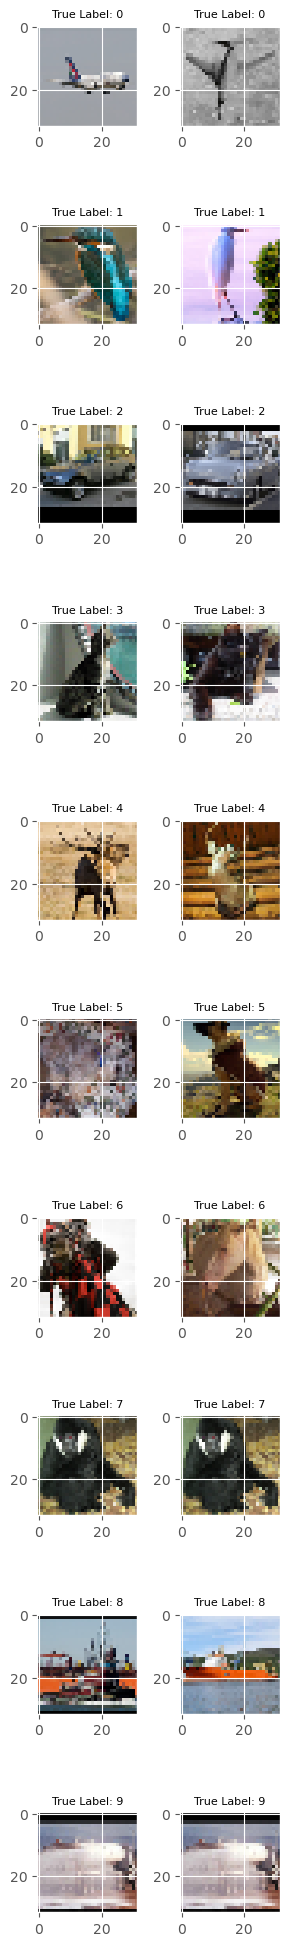

In [57]:
plot_image_grid(nb_classes, samples_per_class, image_samples, label_samples, (32,32,3), False)

Visualize 20 attacked images and adversarial labels.

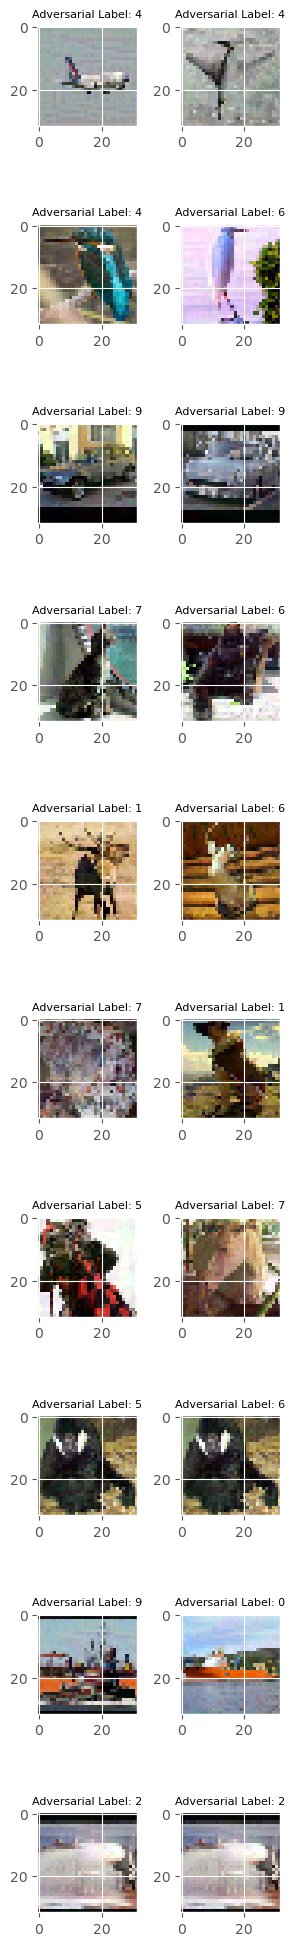

In [58]:
plot_image_grid(nb_classes, samples_per_class, image_samples_adv_mim, label_samples_adv_mim, (32,32,3), True)

<br>
<u>FGSM Attack</u>

In [60]:
y_adv = []
y_true = []
for X_batch, y_batch in x_test_batch:
    X_batch_adv = fgsm_attack(model=best_model.model, 
                            input_image=X_batch, 
                            input_label=y_batch, 
                            epsilon=0.0313,  
                            clip_value_min=0.0, 
                            clip_value_max=1.0,
                            soft_label=False)   # we provide input label
    y_batch_adv = np.argmax(best_model.model(X_batch_adv).numpy(), 1)
    y_adv.append(y_batch_adv[0].tolist())
    y_true.append(y_batch.numpy()[0].tolist())

Compute the robust accuracy after FGSM attack.

In [61]:
test_adv_acc_fgsm = accuracy_score(y_true, y_adv)
print("Test adv accuracy for FGSM attack: {}".format(test_adv_acc_fgsm))

Test adv accuracy for FGSM attack: 0.08


Attack the model with FGSM attack on the testing set.

In [62]:
image_samples_adv_fgsm = fgsm_attack(model=best_model.model, 
                               input_image=image_samples, 
                               input_label=label_samples, 
                               epsilon=0.0313,  
                               clip_value_min=0.0, 
                               clip_value_max=1.0)
image_samples_adv_fgsm = image_samples_adv_fgsm.numpy()
label_samples_adv_fgsm = np.argmax(best_model.model(image_samples_adv_fgsm).numpy(), 1)

Visualize 20 original images and true labels.

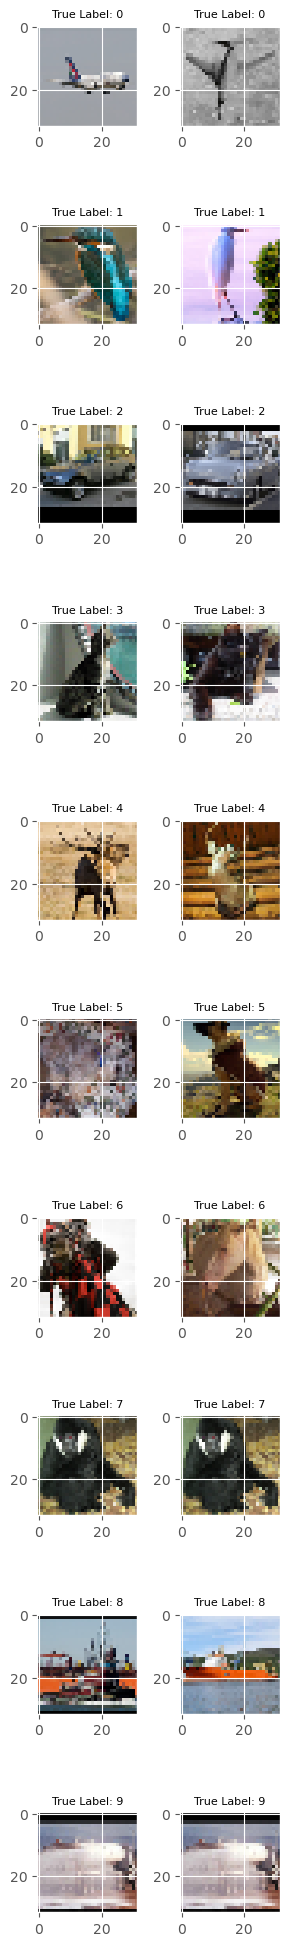

In [63]:
plot_image_grid(nb_classes, samples_per_class, image_samples, label_samples, (32,32,3), False)

Visualize 20 attacked images and adversarial labels.

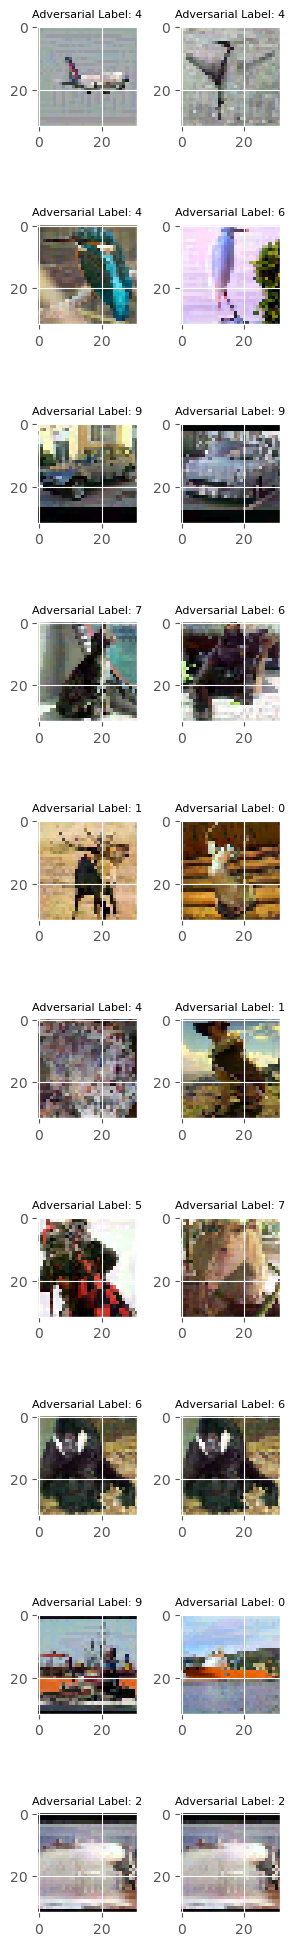

In [64]:
plot_image_grid(nb_classes, samples_per_class, image_samples_adv_fgsm, label_samples_adv_fgsm, (32,32,3), True)

### <span style="color:#0b486b">Question 3.9: Train a robust model</span>

Train a robust model using adversarial training with PGD ${\epsilon= 0.0313, k=10, \eta= 0.002}$. Write the code for the adversarial training and report the robust accuracies. After finishing the training, you need to store your best robust model in the folder `./models` and load the model to evaluate the robust accuracies for PGD, MIM, and FGSM attacks with $\epsilon= 0.0313, k=20, \eta= 0.002$ on the testing set.
   
<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>

The robust accuracy of the `best_robust_model` trained with adversarial training with PGD ${\epsilon= 0.0313, k=10, \eta= 0.002}$ is $0.34$ ($34\%$ accuracy).

After the adversarial training, the robust accuracy of the `best_robust_model` is the highest for both the PGD and MIM attacks equally ($0.216$ or $21.6\%$ accuracy), followed by the FGSM attack ($0.212$ or $21.2\%$ accuracy), with $\epsilon= 0.0313, k=20, \eta= 0.002$ on the testing set. 

All these robust accuracies indicate that the `best_robust_model` does actually learn from the adversarial sample data during the adversarial training process, and therefore their robust accuracies show significant improvement, as we can see that their robust accuracies are significantly low in Question 3.8 above, which are only $0.08$, $0.072$ and $0.064$.

Build a robust model.

In [65]:
# num_blocks = 4
# use_skip = True
# learning_rate = 0.001
# is_augmentation = True
# data_mixup = False

best_robust_model = YourModel(name='best_robust_model',
                              feature_maps=32,
                              num_classes=data_manager.n_classes,
                              num_blocks=best_num_blocks,
                              drop_rate=0.0, 
                              batch_norm=True, 
                              is_augmentation=best_is_augmentation,
                              use_skip=best_use_skip,
                              optimizer='adam',
                              learning_rate=best_learning_rate,
                              data_mixup=best_data_mixup)
best_robust_model.build_cnn()
best_robust_model.summary()

Model: "model_18"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_19 (InputLayer)          [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_112 (Conv2D)            (None, 32, 32, 32)   896         ['input_19[0][0]']               
                                                                                                  
 batch_normalization_108 (Batch  (None, 32, 32, 32)  128         ['conv2d_112[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_108 (Activation)    (None, 32, 32, 32)   0           ['batch_normalization_108[

In [66]:
optimizer = best_robust_model.optimizer
loss_obj = tf.nn.sparse_softmax_cross_entropy_with_logits

# metrics to track the different accuracies
train_loss = tf.metrics.Mean(name='train_loss')
test_acc_clean = tf.metrics.SparseCategoricalAccuracy()
test_acc_pgd = tf.metrics.SparseCategoricalAccuracy()

In [67]:
def train_step_adv(x, x_adv, y):
    with tf.GradientTape() as tape:
        logits = best_robust_model.model(x)  # normal 
        logits_adv = best_robust_model.model(x_adv)  # adversarial
        loss = (loss_obj(y, logits) + loss_obj(y, logits_adv))/2
        gradients = tape.gradient(loss, best_robust_model.model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, best_robust_model.model.trainable_variables))
    return loss

Adversarially train the `best_robust_model` on adversarial examples which are generated by `pgd_attack` with `epsilon=0.0313`, `num_steps=10` and `step_size=0.002`.

In [68]:
epochs = 5   # number of epochs
iterations = len(X_train)   # total number of data in the training set

for epoch in range(epochs):
    # keras like display of progress
    progress_bar_train = tf.keras.utils.Progbar(iterations, verbose=2)

    for (x, y) in x_train_batch:
        # replace clean example with adversarial example by 10-steps projected_gradient_descent for adversarial training
        x_adv = pgd_attack(model=best_robust_model.model, 
                           input_image=x, 
                           input_label=y, 
                           epsilon=0.0313, 
                           num_steps=10, 
                           step_size=0.002, 
                           clip_value_min=0.0, 
                           clip_value_max=1.0)
        loss = train_step_adv(x, x_adv, y)
        y_pred = best_robust_model.model(x)
        test_acc_clean(y, y_pred)
        train_loss(loss)
        progress_bar_train.add(x.shape[0], values=[('loss', train_loss.result()), ("acc (%)", test_acc_clean.result() * 100)])

4500/4500 - 120s - loss: 2.2624 - acc (%): 19.8410 - 120s/epoch - 27ms/step
4500/4500 - 116s - loss: 2.2281 - acc (%): 25.1465 - 116s/epoch - 26ms/step
4500/4500 - 123s - loss: 2.2040 - acc (%): 28.3147 - 123s/epoch - 27ms/step
4500/4500 - 123s - loss: 2.1891 - acc (%): 30.5367 - 123s/epoch - 27ms/step
4500/4500 - 118s - loss: 2.1769 - acc (%): 32.2346 - 118s/epoch - 26ms/step


Save the `best_robust_model` in the folder `./models` after the adversarial training is done.

In [69]:
best_robust_model.model.save("./models/part3")

# check if the later loaded model is the same as this saved model
best_robust_model.model.summary()

Model: "model_18"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_19 (InputLayer)          [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_112 (Conv2D)            (None, 32, 32, 32)   896         ['input_19[0][0]']               
                                                                                                  
 batch_normalization_108 (Batch  (None, 32, 32, 32)  128         ['conv2d_112[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_108 (Activation)    (None, 32, 32, 32)   0           ['batch_normalization_108[

Evaluate the robust accuracy for PGD attack with `epsilon=0.0313`, `num_steps=10` and `step_size=0.002` on the testing set.

In [70]:
y_adv_pgd_10 = []
y_true = []
for X_batch, y_batch in x_test_batch:
    X_batch_adv = pgd_attack(model=best_robust_model.model, input_image=X_batch, input_label=y_batch, 
                             epsilon=0.0313, num_steps=10, step_size=0.002, clip_value_min=0.0, clip_value_max=1.0)
    y_batch_adv = np.argmax(best_robust_model.model(X_batch).numpy(), 1)
    y_adv_pgd_10.append(y_batch_adv[0].tolist())
    y_true.append(y_batch.numpy()[0].tolist())

In [71]:
test_adv_acc_pgd_10 = accuracy_score(y_true, y_adv_pgd_10)
print("Test adv accuracy on PGD attack (k=10) after adversarial training: {}".format(test_adv_acc_pgd_10))

Test adv accuracy on PGD attack (k=10) after adversarial training: 0.34


Load the `best_robust_model` that has been saved previously.

In [72]:
loaded_model = tf.keras.models.load_model("./models/part3")

# check if this loaded model is the same as the above saved model
loaded_model.summary()

Model: "model_18"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_19 (InputLayer)          [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_112 (Conv2D)            (None, 32, 32, 32)   896         ['input_19[0][0]']               
                                                                                                  
 batch_normalization_108 (Batch  (None, 32, 32, 32)  128         ['conv2d_112[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_108 (Activation)    (None, 32, 32, 32)   0           ['batch_normalization_108[

Evaluate the robust accuracy for PGD attack with `epsilon=0.0313`, `num_steps=20` and `step_size=0.002` on the testing set.

In [73]:
y_adv_pgd_20 = []
y_true = []
for X_batch, y_batch in x_test_batch:
    X_batch_adv = pgd_attack(model=loaded_model, input_image=X_batch, input_label=y_batch, 
                                     epsilon=0.0313, num_steps=20, step_size=0.002, clip_value_min=0.0, clip_value_max=1.0)
    y_batch_adv = np.argmax(loaded_model(X_batch_adv).numpy(), 1)
    y_adv_pgd_20.append(y_batch_adv[0].tolist())
    y_true.append(y_batch.numpy()[0].tolist())

In [74]:
test_adv_acc_pgd_20 = accuracy_score(y_true, y_adv_pgd_20)
print("Test adv accuracy on PGD attack (k=20) after adversarial training: {}".format(test_adv_acc_pgd_20))

Test adv accuracy on PGD attack (k=20) after adversarial training: 0.216


Evaluate the robust accuracy for MIM attack with `epsilon=0.0313`, `num_steps=20` and `step_size=0.002` on the testing set.

In [75]:
y_adv_mim_20 = []
y_true = []
for X_batch, y_batch in x_test_batch:
    X_batch_adv = mim_attack(model=loaded_model, input_image=X_batch, input_label=y_batch, 
                                     epsilon=0.0313, num_steps=20, step_size=0.002, clip_value_min=0.0, clip_value_max=1.0)
    y_batch_adv = np.argmax(loaded_model(X_batch_adv).numpy(), 1)
    y_adv_mim_20.append(y_batch_adv[0].tolist())
    y_true.append(y_batch.numpy()[0].tolist())

In [80]:
test_adv_acc_mim_20 = accuracy_score(y_true, y_adv_mim_20)
print("Test adv accuracy on MIM attack (k=20) after adversarial training: {}".format(test_adv_acc_mim_20))

Test adv accuracy on MIM attack (k=20) after adversarial training: 0.216


Evaluate the robust accuracy for FGSM attack with `epsilon=0.0313`, `num_steps=20` and `step_size=0.002` on the testing set.

In [77]:
y_adv_fgsm_20 = []
y_true = []
for X_batch, y_batch in x_test_batch:
    X_batch_adv = fgsm_attack(model=best_robust_model.model, input_image=X_batch, input_label=y_batch, 
                                      epsilon=0.0313, clip_value_min=0.0, clip_value_max=1.0)
    y_batch_adv = np.argmax(best_robust_model.model(X_batch_adv).numpy(), 1)
    y_adv_fgsm_20.append(y_batch_adv[0].tolist())
    y_true.append(y_batch.numpy()[0].tolist())

In [81]:
test_adv_acc_fgsm_20 = accuracy_score(y_true, y_adv_fgsm_20)
print("Test adv accuracy on FGSM attack (k=20) after adversarial training: {}".format(test_adv_acc_fgsm_20))

Test adv accuracy on FGSM attack (k=20) after adversarial training: 0.212


The following is an exploring question with bonus points. It is great if you try to do this question, but it is **totally optional**. In this question, we will investigate a recent SOTA technique to improve the generalization ability of deep nets named *Sharpness-Aware Minimization (SAM)* ([link to the main paper](https://openreview.net/pdf?id=6Tm1mposlrM)).  Furthermore, SAM is simple and efficient technique, but roughly doubles the training time due to its required computation. If you have an idea to improve SAM, it would be a great paper to top-tier venues in machine learning and computer vision. Highly recommend to give it a try. 

### <span style="color:#0b486b">Question 3.10</span> (bonus question)

Read the SAM paper ([link to the main paper](https://openreview.net/pdf?id=6Tm1mposlrM)). Try to apply this technique to the best obtained model and report the results. For the purpose of implementing SAM, we can flexibly add more cells and extensions to the `A1_S2_2023.py` file.

<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>

In [79]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
# You can add more cells if necessary


--- 
**<div style="text-align: center"> <span style="color:black">END OF TASK</span> </div>**